In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
import seaborn as sns

In [74]:
seed = 0
np.random.seed(seed)

In [75]:
# load the Boston housing dataset from sklearn
boston = load_boston()
bos = pd.DataFrame(boston.data)

# give our DataFrame the appropriate feature names
bos.columns = boston.feature_names

# Add the target variable to the DataFrame
bos['Price'] = boston.target

In [76]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [77]:
# use a standard train/test split for comparing model performance across students
# Split the data into a train test split
bos_train_X, bos_test_X, bos_train_y, bos_test_y = train_test_split(bos.drop(['Price'], axis = 1), bos['Price'], test_size=0.25, random_state=seed, shuffle=True)

In [78]:
frame=[bos_train_X,bos_train_y]
train=pd.concat(frame,axis=1)
frame=[bos_test_X,bos_test_y]
test=pd.concat(frame,axis=1)

In [79]:
test.shape

(127, 14)

In [80]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46,18.5
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05,33.2
395,8.71675,0.0,18.10,0.0,0.693,6.471,98.8,1.7257,24.0,666.0,20.2,391.98,17.12,13.1
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5


In [81]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,379.0,3.412736,8.258225,0.00632,0.07520,0.26363,3.397665,88.9762
ZN,379.0,11.861478,23.810122,0.00000,0.00000,0.00000,20.000000,100.0000
INDUS,379.0,11.083509,7.021496,0.46000,5.04000,8.56000,18.100000,27.7400
CHAS,379.0,0.065963,0.248546,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,379.0,0.556160,0.116179,0.38500,0.44900,0.53800,0.631000,0.8710
RM,379.0,6.312683,0.693391,3.56100,5.90450,6.22900,6.676000,8.7800
AGE,379.0,68.735620,28.214667,2.90000,45.25000,78.10000,93.800000,100.0000
DIS,379.0,3.781929,2.094931,1.17420,2.10035,3.21570,5.116700,12.1265
RAD,379.0,9.411609,8.676092,1.00000,4.00000,5.00000,24.000000,24.0000
TAX,379.0,403.226913,171.319579,187.00000,276.00000,329.00000,666.000000,711.0000


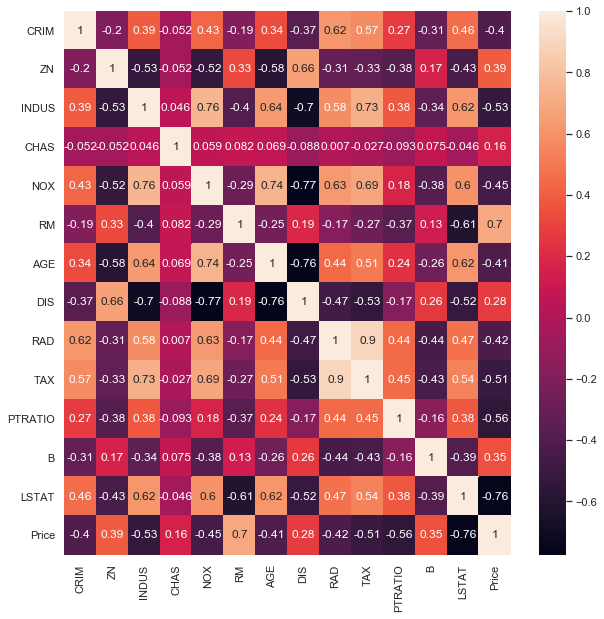

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)
#B,DIS,CHAS,ZN can be deleted

In [ ]:
sns.pairplot(train)

In [83]:
def r2metrics(model,X,y):
    mse=mean_squared_error(y,model.predict(X))
    mae=mean_absolute_error(y,model.predict(X))
    rmse=np.sqrt(mean_squared_error(y,model.predict(X)))
    print('mse :{}'.format(mse))
    print('mae :{}'.format(mae))
    print('rmse :{}'.format(rmse))
def plotgraph(model,X_train,y_train,X_test,y_test):
    import seaborn as sns
    sns.set(color_codes=True)
    plt.figure(figsize=(10,9))
    sns.regplot(x=y_test, y=model.predict(X_test),fit_reg=True,scatter_kws={"color": "green"});
    sns.regplot(x=y_train, y=model.predict(X_train),fit_reg=True,scatter_kws={"color": "yellow"});
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title('Train data vs Test Data ')
    plt.show()
def rmse_m(model,X,y):
    rmse=np.sqrt(mean_squared_error(y,model.predict(X)))
    print('rmse :{}'.format(rmse))
    return rmse

In [84]:
pipeline_lasso=Pipeline([('scalar1',StandardScaler()),('lasso',Lasso())])
pipeline_ridge=Pipeline([('scalar2',StandardScaler()),('ridge',Lasso())])
pipeline_lr=Pipeline([('scalar11',StandardScaler()),('lr_regressor',LinearRegression())])
pipelines = [pipeline_lasso, pipeline_ridge, pipeline_lr]

In [85]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Lasso Regression', 1: 'Ridge Regression', 2: 'Linear Regression'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(bos_train_X, bos_train_y)

In [86]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    r2metrics(model,bos_test_X,bos_test_y)
    

Lasso Regression 
mse :35.489636168280335
mae :3.9285318553756823
rmse :5.957317866983458
Ridge Regression 
mse :35.489636168280335
mae :3.9285318553756823
rmse :5.957317866983458
Linear Regression 
mse :29.782245092302325
mae :3.6683301481357153
rmse :5.457311159564051


In [87]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    cv_scores = cross_val_score(model,bos_test_X,bos_test_y,cv=10, scoring='neg_mean_squared_error')
    print(" cvscore : {} ".format(np.mean(np.sqrt(-cv_scores))))

Lasso Regression 
 cvscore : 6.052946624017443 
Ridge Regression 
 cvscore : 6.052946624017443 
Linear Regression 
 cvscore : 5.609702465304354 


Lasso Regression 


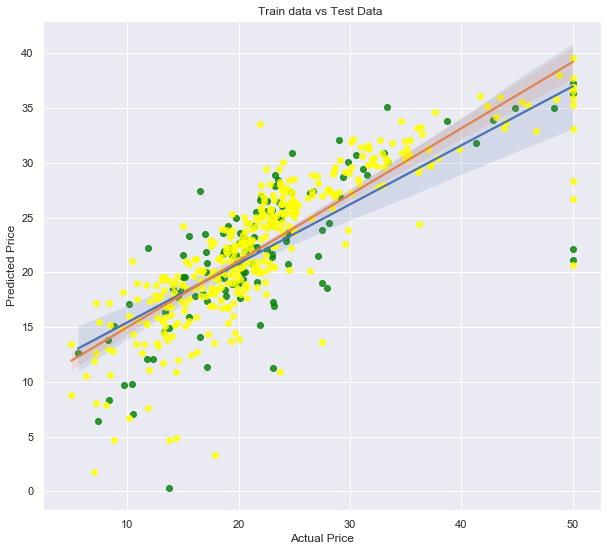

Ridge Regression 


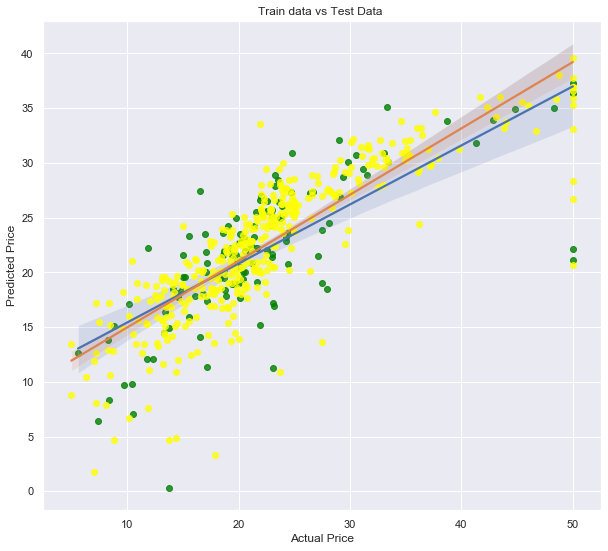

Linear Regression 


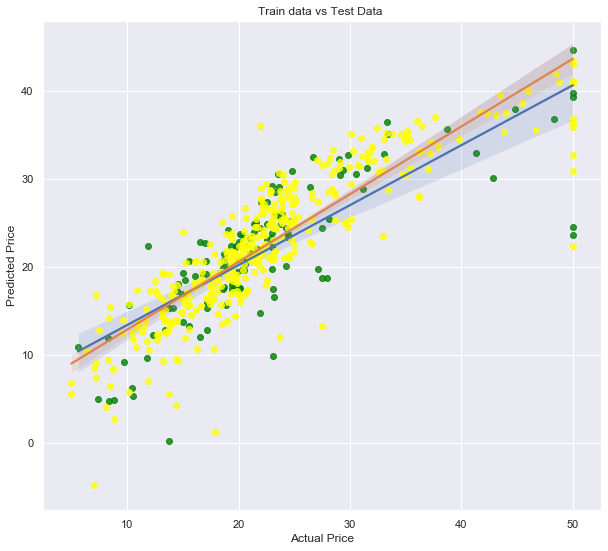

In [88]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    plotgraph(model,bos_train_X,bos_train_y,bos_test_X,bos_test_y)

In [ ]:
'''
best_rmse=0.0
best_regressor=0
best_pipeline=""
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    print(i)
    if rmse_m(model,bos_test_X,bos_test_y)<=best_rmse:
        best_rmse=rmse_m(model,bos_test_X,bos_test_y)
        best_pipeline=model
        best_regressor=i
print('Regressor with best rmse:{}'.format(pipe_dict[best_regressor]))
'''
    

In [89]:
bos_train_X.columns
#B,DIS,CHAS,ZN can be deleted--correlation matrix
importance=pd.DataFrame(pipeline_lasso['lasso'].coef_,bos_train_X.columns)
importance.reset_index(inplace=True)
importance.columns={'atrribute','coefficient'}
importance
#ZN,INDUS,CHAS,NOX,AGE,RAD,TAX,B

,atrribute,coefficient
0,CRIM,-0.000000
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,2.529330
6,AGE,-0.000000
7,DIS,-0.000000
8,RAD,-0.000000
9,TAX,-0.227631


In [90]:
importance[importance['coefficient'].abs()>0.3]

,atrribute,coefficient
5,RM,2.529330
10,PTRATIO,-1.700884
12,LSTAT,-3.605655


In [91]:
train_copy=train.copy()
test_copy=test.copy()

In [92]:
X_train=train_copy[['RM', 'PTRATIO', 'LSTAT' ]]
y_train=train_copy['Price']
X_test=test_copy[['RM', 'PTRATIO', 'LSTAT' ]]
y_test=test_copy['Price']

In [93]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [94]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    r2metrics(model,X_train,y_train)

Lasso Regression 
mse :25.770523832866157
mae :3.5957499649738454
rmse :5.076467653089711
Ridge Regression 
mse :25.770523832866157
mae :3.5957499649738454
rmse :5.076467653089711
Linear Regression 
mse :24.186023274469267
mae :3.4972655231591925
rmse :4.917928758580106


In [95]:
for i,model in enumerate(pipelines):
    print("{} ".format(pipe_dict[i]))
    cv_scores = cross_val_score(model,X_train,y_train,cv=10, scoring='neg_mean_squared_error')
    print(" cvscore : {} ".format(np.mean(np.sqrt(-cv_scores))))

Lasso Regression 
 cvscore : 5.098144704454314 
Ridge Regression 
 cvscore : 5.098144704454314 
Linear Regression 
 cvscore : 4.937926014593566 
